**Task**:
    
    analysis of several time series data (AO, NAO)

**Modules**:
    
    pandas

[**Notebook file**](http://nbviewer.ipython.org/urls/github.com/koldunovn/earthpy.org/raw/master/content/earthpy_pandas_basics.ipynb)   

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

As an example we are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets.

## Module import

First we have to import necessary modules:

In [5]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows

And "switch on" inline graphic for the notebook:

In [7]:
%pylab inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.kernel.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


Pandas developing very fast, and while we are going to use only basic functionality, some details may still change in the newer versions. This example will only work in version > 0.8. Check yours:

In [8]:
pd.__version__

'0.10.1'

## Loading data

Now, when we are done with preparations, let's get some data. If you work on Windows download monthly AO data [from here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii). If you on *nix machine, you can do it directly from ipython notebook using system call to wget command:

In [9]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2013-03-29 13:52:47--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.33.21, 140.90.200.11, 140.90.200.21, ...
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.33.21|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18950 (19K) [text/plain]
Saving to: `monthly.ao.index.b50.current.ascii.2'

100%[======================================>] 18,950      --.-K/s   in 0.1s    

2013-03-29 13:52:48 (167 KB/s) - `monthly.ao.index.b50.current.ascii.2' saved [18950/18950]



Pandas has very good IO capabilities, but we not going to use them in this tutorial in order to keep things simple. For now we open the file simply with numpy loadtxt:

In [10]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

Every line in the file consist of three elements: year, month, value:

In [16]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

And here is the shape of our array:

In [17]:
ao.shape

(758, 3)

## Time Series

We would like to convert this data in to time series, that can be manipulated naturally and easily. First step, that we have to do is to create the range of dates for our time series. From the file it is clear, that record starts at January 1950 and ends at February 2013 (at the time I am writing this, of course). Frequency of the data is one month (freq='M'). 

In [18]:
dates = pd.date_range('1950-01', '2013-03', freq='M')

As you see syntax is quite simple, and this is one of the reasons why I love Pandas so much :) Another thing to mention, is that we put March 2003 instead of February because the interval is open on the right side. You can check if the range of dates is properly generated:

In [20]:
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[1950-01-31 00:00:00, ..., 2013-02-28 00:00:00]
Length: 758, Freq: M, Timezone: None

In [21]:
dates.shape

(758,)

Now we are ready to create our first time series. Dates from the *dates* variable will be our index, and AO values will be our, hm... values:

In [22]:
AO = Series(ao[:,2], index=dates)

In [23]:
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
...
2012-09-30    0.77225
2012-10-31   -1.51400
2012-11-30   -0.11057
2012-12-31   -1.74860
2013-01-31   -0.60952
2013-02-28   -1.00740
Freq: M, Length: 758

Now we can plot complete time series:

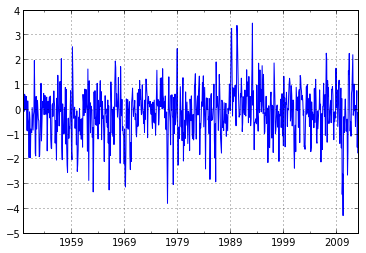

In [26]:
AO.plot()

or its part:

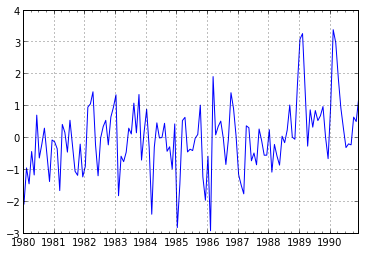

In [28]:
AO['1980':'1990'].plot()

or even smaller part:

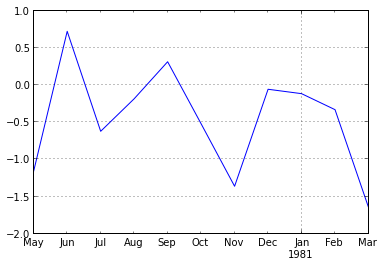

In [29]:
AO['1980-05':'1981-03'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By number: 

In [48]:
AO[120]

-2.4842

or by index (date in our case):

In [45]:
AO['1960-01']

1960-01-31   -2.4842
Freq: M

And what if we choose only one year?

In [46]:
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M

Isn't that great? :)

One bonus example :)

In [68]:
AO[AO > 0]

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
...
2011-12-31    2.220800
2012-03-31    1.037100
2012-05-31    0.168410
2012-07-31    0.167790
2012-08-31    0.013999
2012-09-30    0.772250
Length: 347

## Data Frame

Now let's make live a bit more interesting and download more data. This will be NOA time series (Windowd users can get it [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii)).

In [49]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

--2013-03-29 15:43:28--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 129.15.96.11, 129.15.96.21, 140.90.33.11, ...
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|129.15.96.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18192 (18K) [text/plain]
Saving to: `norm.nao.monthly.b5001.current.ascii.2'

100%[======================================>] 18,192       109K/s   in 0.2s    

2013-03-29 15:43:29 (109 KB/s) - `norm.nao.monthly.b5001.current.ascii.2' saved [18192/18192]



Create Series the same way as we did for AO:

In [50]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
dates_nao = pd.date_range('1950-01', '2013-03', freq='M')
NAO = Series(nao[:,2], index=dates_nao)

Time period is the same:

In [52]:
NAO.index

<class 'pandas.tseries.index.DatetimeIndex'>
[1950-01-31 00:00:00, ..., 2013-02-28 00:00:00]
Length: 758, Freq: M, Timezone: None

Now we create Data Frame, that will contain both AO and NAO data. It sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [53]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

One can plot the data straight away:

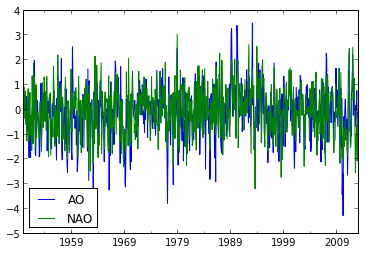

In [55]:
aonao.plot()

Or have a look at the first several rows:

In [57]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


We can reference each column by its name:

In [58]:
aonao['NAO']

1950-01-31    0.92
1950-02-28    0.40
1950-03-31   -0.36
1950-04-30    0.73
1950-05-31   -0.59
...
2012-09-30   -0.58608
2012-10-31   -2.06200
2012-11-30   -0.57820
2012-12-31    0.17064
2013-01-31    0.34530
2013-02-28   -0.45306
Freq: M, Name: NAO, Length: 758

or as method of the Data Frame variable (if name of the variable is a valid python name):

In [77]:
aonao.NAO

1950-01-31    0.92
1950-02-28    0.40
1950-03-31   -0.36
1950-04-30    0.73
1950-05-31   -0.59
...
2012-09-30   -0.58608
2012-10-31   -2.06200
2012-11-30   -0.57820
2012-12-31    0.17064
2013-01-31    0.34530
2013-02-28   -0.45306
Freq: M, Name: NAO, Length: 758

We can simply add column to the Data Frame:

In [82]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


And delete it:

In [83]:
del aonao['Diff']
aonao.tail()

,AO,NAO
2012-10-31,-1.51400,-2.06200
2012-11-30,-0.11057,-0.57820
2012-12-31,-1.74860,0.17064
2013-01-31,-0.60952,0.34530
2013-02-28,-1.00740,-0.45306


Slicing will also work:

In [86]:
aonao['1981-01':'1981-03']

,AO,NAO
1981-01-31,-0.11634,0.37
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19


even in some crazy combinations:

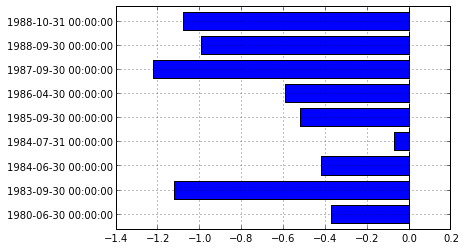

In [107]:
import datetime
aonao.ix[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

Here we use special [advanced indexing attribute .ix](http://pandas.pydata.org/pandas-docs/stable/indexing.html#advanced-indexing-with-labels). We choose all NAO values in the 1980s for months where AO is positive and NAO is negative, and then plot them. Magic :)

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [122]:
aonao.mean()

AO    -0.133043
NAO   -0.032465

In [123]:
aonao.max()

AO     3.4953
NAO    3.0400

In [124]:
aonao.min()

AO    -4.2657
NAO   -3.1800

You can also do it row-wise:

In [113]:
aonao.mean(1)

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
...
2012-09-30    0.093085
2012-10-31   -1.788000
2012-11-30   -0.344385
2012-12-31   -0.788980
2013-01-31   -0.132110
2013-02-28   -0.730230
Freq: M, Length: 758

Or get everything at once:

In [125]:
aonao.describe()

,AO,NAO
count,758.000000,758.000000
mean,-0.133043,-0.032465
std,1.003774,1.001887
min,-4.265700,-3.180000
25%,-0.671770,-0.767500
50%,-0.058805,-0.015000
75%,0.463980,0.660000
max,3.495300,3.040000


## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates annual ('A') mean:

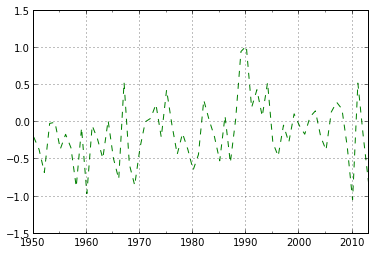

In [349]:
AO_mm = AO.resample("A")
AO_mm.plot(style='g--')

median:

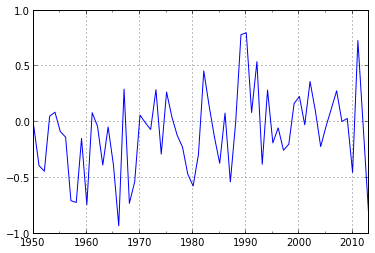

In [352]:
AO_mm = AO.resample("A", how='median')
AO_mm.plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

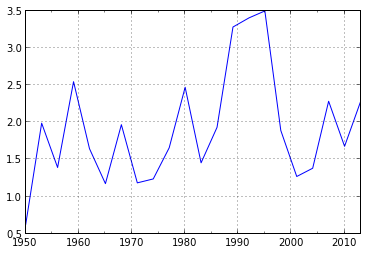

In [357]:
AO_mm = AO.resample("3A", how=np.max)
AO_mm.plot()

You can specify several functions at once as a list:

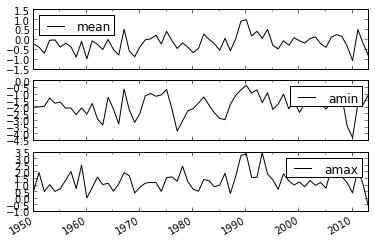

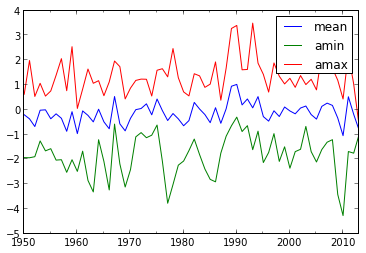

In [360]:
AO_mm = AO.resample("A", how=['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

## Moving (rolling) statistics

Pandas provide good collection of moving statistics.

Rolling mean:

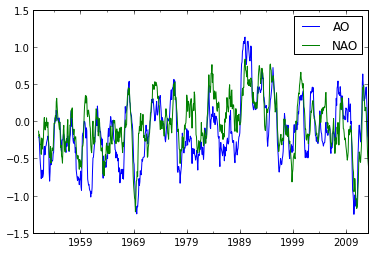

In [371]:
pd.rolling_mean(aonao, window=12).plot(style='-g')

Rolling correlation:

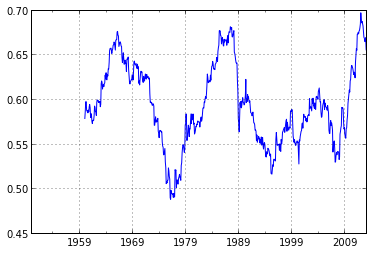

In [377]:
pd.rolling_corr(aonao.AO, aonao.NAO, window=120).plot(style='-g')

By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [379]:
aonao.corr()

,AO,NAO
AO,1.000000,0.610255
NAO,0.610255,1.000000


That's it. I hope you at least get a rough impression of what pandas can do for you. Comments are very welcome (below). If you have intresting examples of pandas usage in Earth Science, we would be happy to put them on [EarthPy](http://earthpy.org).